# Исследование объявлений о продаже квартир

## Содержание
1. [Введение.](#paragraph1)
2. [Изучение общей информации.](#paragraph2)
3. [Предобработка данных.](#paragraph3)
4. [Расчет данных.](#paragraph4)
5. [Исследовательский анализ данных.](#paragraph5)
6. [Избавлямся от выбросов.](#paragraph6)
7. [Какие факторы больше всего влияют на стоимость квартиры.](#paragraph7)
8. [Общий вывод.](#paragraph8)

### Введение. <a name="paragraph1"></a>

В нашем рапоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире доступны два вида данных: вписанные пользователем и полученные автоматически на основе картографических данных. Задача предстоящего исследования заключается в изучении данных о квартрирах в Петербурге и Ленинградский области. Результатом исследования станет выявление принципиальных и важных параментов квартир, которые влияют на ее стоимость.

### Изучение общей информации. <a name="paragraph2"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [5]:
display(data.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9671,14,5500000.0,57.00,2018-02-20T00:00:00,2,2.70,12.0,30.0,11,NaN,...,8.0,2.0,Санкт-Петербург,36198.0,12047.0,1.0,480.0,1.0,469.0,37.0
10445,20,7500000.0,56.00,2016-05-11T00:00:00,2,3.50,4.0,28.0,1,False,...,11.3,0.0,Санкт-Петербург,25415.0,4262.0,0.0,NaN,1.0,673.0,71.0
20939,9,5800000.0,60.60,2015-07-08T00:00:00,2,NaN,25.0,32.9,6,NaN,...,9.8,0.0,Санкт-Петербург,22306.0,17634.0,0.0,NaN,1.0,132.0,688.0
7548,4,19500000.0,84.58,2018-11-19T00:00:00,2,NaN,9.0,37.1,2,NaN,...,18.3,NaN,Санкт-Петербург,32713.0,5873.0,1.0,1562.0,3.0,369.0,90.0
3889,4,710000.0,47.70,2018-07-08T00:00:00,2,NaN,2.0,NaN,2,NaN,...,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,45.0
14457,5,5300000.0,53.50,2017-09-09T00:00:00,2,2.80,16.0,30.0,9,NaN,...,8.0,NaN,Санкт-Петербург,28643.0,12309.0,1.0,721.0,1.0,109.0,103.0
13026,6,4450000.0,44.10,2019-05-02T00:00:00,2,2.52,9.0,27.3,6,NaN,...,6.7,NaN,Санкт-Петербург,29090.0,13378.0,0.0,NaN,0.0,NaN,NaN
18993,15,6700000.0,65.00,2018-08-07T00:00:00,2,2.75,12.0,36.0,5,NaN,...,10.5,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,9.0
847,11,4890000.0,57.50,2015-12-17T00:00:00,3,NaN,9.0,39.0,6,NaN,...,6.5,0.0,Санкт-Петербург,51053.0,16381.0,0.0,NaN,0.0,NaN,216.0
1181,9,5900000.0,57.00,2017-12-12T00:00:00,2,2.54,14.0,24.9,4,NaN,...,16.0,NaN,Санкт-Петербург,34160.0,11725.0,1.0,153.0,1.0,377.0,64.0


### Вывод

Имеем в распоряжении большое количество данных о квартирах со множеством свойств, которые отражены в колонках. Колонок 22, строк 23699. Наблюдаются пустые значения в части данных, нужно будет их обработать. Также видим 3 типа данных, причем преобладает object (17), необходимо будет изменить этот тип для удобства проведения анализа.

### Предобработка данных. <a name="paragraph3"></a>

Изучим наличие пропусков и заполним их там, где необходимо.

In [6]:
nans = data.isna().sum().reset_index()
nans.columns = ['column', 'count']
nans['%'] = nans['count'] / len(data) * 100
display(nans.query('count != 0'))

,column,count,%
5,ceiling_height,9195,38.799105
6,floors_total,86,0.362885
7,living_area,1903,8.029875
9,is_apartment,20924,88.290645
12,kitchen_area,2278,9.612220
13,balcony,11519,48.605426
14,locality_name,49,0.206760
15,airports_nearest,5542,23.384953
16,cityCenters_nearest,5519,23.287902
17,parks_around3000,5518,23.283683


Наблюдаем большое количество пропусков в разных данных, но заполнять буду их по необходимости исходя из поставленной задачи.
Среди важнейших показателяй, по которым я буду выявлять зависимости, содержат в себе пустые значения следующие: 
 * высота потолков 38% пропусков
 * жилая площадь 8%
 * площадь кухни 9%
 * удаленность от центра 23%
 * длительность продажи 13%
 

Проведем замену типов данных для удобства расчетов и группировок.

In [7]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Сменим тип данных в столбце first_day_exposition на временной. 

In [8]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Далее нужно заменить все типы данных для числовых значений на float. Там, где нужны были бы int, они уже на месте, что явно облегчает нам задачу.
Столбцов для замены много, произведем замену автоматически, но учтем 2 одно исключения - locality_name должно остаться object'ом, и is_apartment.

In [9]:
types = data.dtypes
types_object = types[(types == 'object') & (types.index != 'locality_name') & (types.index != 'is_apartment')]
data[types_object.index] = data[types_object.index].astype('float')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Замена типов данных произведена. Можно приступать к обработке пропусков. 
Начну с заполнения пропусков в высоте потолков (столбец 'ceiling_height')

In [12]:
display(data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'mean']))

,median,mean
,ceiling_height,ceiling_height
floors_total,,
1.0,2.80,2.740000
2.0,2.70,3.006791
3.0,2.80,2.969474
4.0,3.00,2.986831
5.0,2.55,2.793191
6.0,3.00,3.120743
7.0,3.00,2.946960
8.0,2.80,2.856818


Обнаружено 2 необычные вещи: отсутствие данных по высоте потолков в домах с этажностью 33, а также артефакт в виде нереального среднего значения высоты для домов с 36 этажами. Посмотрим ближе.

In [13]:
display(data.query('floors_total == 36'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,NaN,...,18.7,1,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,11.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,NaN,...,12.0,2,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,NaN


Здесь явно закралась ошибка в высоте потолка. Нам повезло, что квартир в домах с такой этажностью было в продаже всего три. Повезло потому что мы можем визуально изучить остальные данные и заметить, у представленных трех квартир абсолютно одинаковая удаленность от центра, от аэропорта, от пруда. Такое совпадение было бы невозможно, поэтому можно выдвинуть смелое предположение, что все это об одном и том же доме.
Заменим все значения высоты потолков в 36 этажном доме на 2,7 м.

In [14]:
data.loc[data['floors_total'] == 36, 'ceiling_height'] = 2.7
display(data.query('floors_total == 36'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.7,36.0,21.4,28,NaN,...,18.7,1,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,11.0
5807,17,8150000.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,NaN,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,NaN,...,12.0,2,Санкт-Петербург,18732.0,20444.0,0,0,3.0,80,NaN


Готово. Теперь произведем замену пустых значений в столбце ceiling_height.

In [15]:
avg_ceiling_height = data.groupby('floors_total')['ceiling_height'].median()
data_edited = data.join(avg_ceiling_height, on='floors_total', rsuffix='_avg')
data_edited.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_avg
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482,2.0,755,NaN,2.70
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0,0,0.0,0,81.0,2.75
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90,2.0,574,558.0,2.55
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84,3.0,234,424.0,2.60
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112,1.0,48,121.0,2.60


In [16]:
data_edited['ceiling_height'] = data_edited['ceiling_height'].fillna(data_edited['ceiling_height_avg'])
display(data_edited['ceiling_height'].isna().sum())

78

Осталось 78 пустых значений, потому что у данных строк отсутствуют значения в столбце floors_total, в связке с которым мы заполняли пропуски. Данный факт никак не исправить исходя из наших данных, оставим пустыми.

Произведем заполнение пустых значений по жилой площади и площади кухни. Для автоматизации создадим функцию.

In [17]:
display(data_edited['living_area'].isna().sum())

1903

In [18]:
def filling_na(df, column, value):
    df = df.join((df.groupby(column)[value].mean()), on=column, rsuffix='_m')
    df[value] = df[value].fillna(df[value+'_m'])
    return df

In [19]:
data_edited = filling_na(data_edited, 'total_area', 'living_area')

In [20]:
data_edited = filling_na(data_edited, 'total_area', 'kitchen_area')

In [21]:
display(data_edited['living_area'].isna().sum())
display(data_edited['kitchen_area'].isna().sum())

143

205

Осталось 143 пустых значения в столбце с жилой площадью и 205 с кухней, потому что ни для одной квартиры с их площадью не указаны размеры жилой и кухни, поэтому не рассчиталось среднее и не заполнились пропуски. Но этих пустых очень мало, можно их проигнорировать. 

Заполним пустые значения в столбце cityCenters_nearest по средним в зависимости от населенного пункта.

In [22]:
locality_names = data_edited.pivot_table(index='locality_name', values='cityCenters_nearest')
display(locality_names)

,cityCenters_nearest
locality_name,
Зеленогорск,54617.583333
Колпино,32113.771513
Красное Село,30020.284091
Кронштадт,49195.726316
Ломоносов,50739.969697
Павловск,33206.921053
Петергоф,35468.925373
Пушкин,28745.375000
Санкт-Петербург,11601.291571


In [23]:
data_edited = filling_na(data_edited, 'locality_name', 'cityCenters_nearest')

In [24]:
display(data_edited['cityCenters_nearest'].isna().sum())

5394

Заполнились пропуски негусто, но выцепить больше информации исходя из того, что у нас есть, к сожалению, не получится. Оставим остальные значения пустыми.

Сохраним наши данные в новый датафрейм.

In [25]:
data_edited.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_avg,living_area_m,kitchen_area_m,cityCenters_nearest_m
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,16028.0,1,482,2.0,755,NaN,2.70,61.524000,16.953846,11601.291571
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.600000,1,NaN,...,18603.0,0,0,0.0,0,81.0,2.75,18.737143,10.765185,24243.387615
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.300000,4,NaN,...,13933.0,1,90,2.0,574,558.0,2.55,34.222680,8.830464,11601.291571
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,80.200000,9,NaN,...,6800.0,2,84,3.0,234,424.0,2.60,80.200000,16.100000,11601.291571
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,8098.0,2,112,1.0,48,121.0,2.60,55.935385,17.300000,11601.291571
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,NaN,...,NaN,0,0,NaN,0,55.0,2.65,16.596522,6.560870,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.600000,6,NaN,...,19143.0,0,0,0.0,0,155.0,2.66,16.116250,10.140625,19924.776758
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,42.771429,22,NaN,...,11634.0,0,0,0.0,0,NaN,2.75,42.771429,11.006667,11601.291571
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,NaN,...,NaN,0,0,NaN,0,189.0,2.70,15.430000,8.810000,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,...,15008.0,0,0,0.0,0,289.0,2.55,38.075659,9.042033,11601.291571


In [26]:
data_edited.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'ceiling_height_avg',
       'living_area_m', 'kitchen_area_m', 'cityCenters_nearest_m'],
      dtype='object')

In [27]:
data_final = data_edited[['last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'locality_name', 'cityCenters_nearest',
       'days_exposition', 'ceiling_height_avg',
       'living_area_m', 'kitchen_area_m', 'cityCenters_nearest_m']]

### Расчет данных. <a name="paragraph4"></a>

Добавим Цену квадратного метра. 

In [28]:
data_final['sq_price'] = data_final['last_price'] / data_final['total_area']

Добавим столбцы с днем, месяцем и годом.

In [29]:
data_final['weekday'] = data_final['first_day_exposition'].dt.weekday
data_final['month'] = data_final['first_day_exposition'].dt.month
data_final['year'] = data_final['first_day_exposition'].dt.year

In [30]:
data_final.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,ceiling_height_avg,living_area_m,kitchen_area_m,cityCenters_nearest_m,sq_price,weekday,month,year
0,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,25.00,Санкт-Петербург,16028.0,NaN,2.70,61.524000,16.953846,11601.291571,120370.370370,3,3,2019
1,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.600000,1,11.00,посёлок Шушары,18603.0,81.0,2.75,18.737143,10.765185,24243.387615,82920.792079,1,12,2018
2,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.300000,4,8.30,Санкт-Петербург,13933.0,558.0,2.55,34.222680,8.830464,11601.291571,92785.714286,3,8,2015
3,64900000.0,159.00,2015-07-24,3,2.60,14.0,80.200000,9,16.10,Санкт-Петербург,6800.0,424.0,2.60,80.200000,16.100000,11601.291571,408176.100629,4,7,2015
4,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,41.00,Санкт-Петербург,8098.0,121.0,2.60,55.935385,17.300000,11601.291571,100000.000000,1,6,2018
5,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,9.10,городской посёлок Янино-1,NaN,55.0,2.65,16.596522,6.560870,NaN,95065.789474,0,9,2018
6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.600000,6,14.40,посёлок Парголово,19143.0,155.0,2.66,16.116250,10.140625,19924.776758,99195.710456,3,11,2017
7,7915000.0,71.60,2019-04-18,2,2.75,24.0,42.771429,22,18.90,Санкт-Петербург,11634.0,NaN,2.75,42.771429,11.006667,11601.291571,110544.692737,3,4,2019
8,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.430000,26,8.81,посёлок Мурино,NaN,189.0,2.70,15.430000,8.810000,NaN,87454.764777,2,5,2018
9,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,6.50,Санкт-Петербург,15008.0,289.0,2.55,38.075659,9.042033,11601.291571,88524.590164,6,2,2017


Категоризируем этажи.

In [31]:
def type_floors(row): 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data_final['types_floors'] = data_final.apply(type_floors, axis=1) # записываем данные в новый столбец
data_final.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,days_exposition,ceiling_height_avg,living_area_m,kitchen_area_m,cityCenters_nearest_m,sq_price,weekday,month,year,types_floors
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,...,NaN,2.70,61.524000,16.953846,11601.291571,120370.370370,3,3,2019,другой
1,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,11.0,посёлок Шушары,...,81.0,2.75,18.737143,10.765185,24243.387615,82920.792079,1,12,2018,первый
2,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,8.3,Санкт-Петербург,...,558.0,2.55,34.222680,8.830464,11601.291571,92785.714286,3,8,2015,другой
3,64900000.0,159.0,2015-07-24,3,2.60,14.0,80.2,9,16.1,Санкт-Петербург,...,424.0,2.60,80.200000,16.100000,11601.291571,408176.100629,4,7,2015,другой
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,...,121.0,2.60,55.935385,17.300000,11601.291571,100000.000000,1,6,2018,другой


Выведем соотношения соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [32]:
data_final['living_to_total'] = data_final['living_area'] / data_final['total_area']
data_final['kitchen_to_total'] = data_final['kitchen_area'] / data_final['total_area']
data_final.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,living_area_m,kitchen_area_m,cityCenters_nearest_m,sq_price,weekday,month,year,types_floors,living_to_total,kitchen_to_total
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,...,61.524000,16.953846,11601.291571,120370.370370,3,3,2019,другой,0.472222,0.231481
1,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,11.0,посёлок Шушары,...,18.737143,10.765185,24243.387615,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,8.3,Санкт-Петербург,...,34.222680,8.830464,11601.291571,92785.714286,3,8,2015,другой,0.612500,0.148214
3,64900000.0,159.0,2015-07-24,3,2.60,14.0,80.2,9,16.1,Санкт-Петербург,...,80.200000,16.100000,11601.291571,408176.100629,4,7,2015,другой,0.504403,0.101258
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,...,55.935385,17.300000,11601.291571,100000.000000,1,6,2018,другой,0.320000,0.410000


### Исследовательский анализ данных. <a name="paragraph5"></a>

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

#### Гистограмма для площадей.

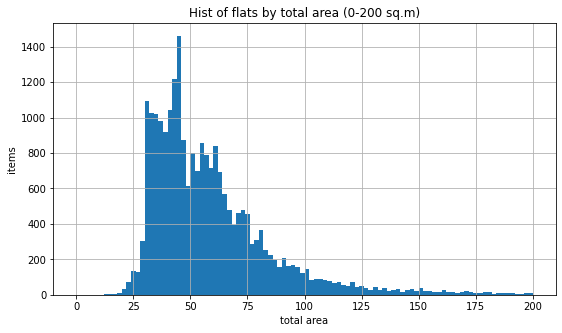

In [40]:
data_final.hist('total_area', bins=100, range=(0, 200), figsize=(9, 5))
plt.ylabel('items'),
plt.xlabel('total area')
plt.title('Hist of flats by total area (0-200 sq.m)')
plt.show()

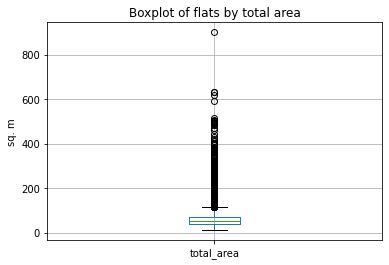

In [42]:
data_final.boxplot(column=['total_area'])
plt.ylabel('sq. m')
plt.title('Boxplot of flats by total area')
plt.show()

Намеренно ограничим масштаб, чтобы посмотреть распределение популярных вариантов.

Гистограмма демонстрирует, что большая часть продаваемых квартир имеет небольшую площадь от 30 и до 60 метров. Далее размеры идут на спад, но наблюдаются также и очень большое жилье, которое мы обрезали на графике.

#### Гистограмма по цене продажи.

In [44]:
data_final['last_price'].describe() #заранее проверила максимум

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

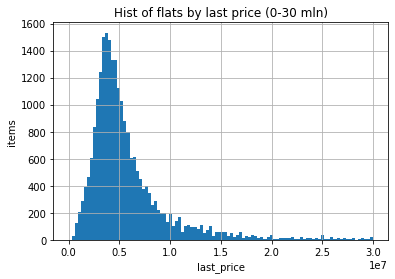

In [47]:
data_final.hist('last_price', bins=100, range=(0, 30000000))
plt.ylabel('items'),
plt.xlabel('last_price')
plt.title('Hist of flats by last price (0-30 mln)')
plt.show()

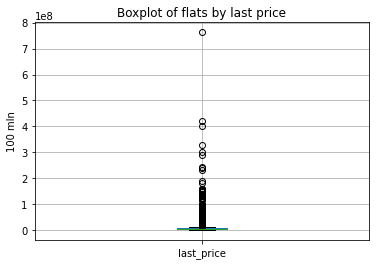

In [49]:
data_final.boxplot(column=['last_price'])
plt.ylabel('100 mln')
plt.title('Boxplot of flats by last price')
plt.show()

Гистограмма без масшабирования по значениям вышла нечитабельной, поэтому выбрала ограничение от 0 до 30 млн рублей. 
Большая часть цен находится в диапазоне от 3 до 6 млн рублей. Боксплот выявил большое количество выбросов. Данные квариры выбираются из понятия среднестатистических, поэтому могут искажать наш анализ. В последующих шагах избавимся от них.

#### Гистограмма по комнатам.

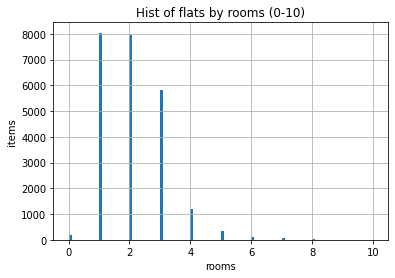

In [51]:
data_final.hist('rooms', bins=100, range=(0, 10))
plt.ylabel('items'),
plt.xlabel('rooms')
plt.title('Hist of flats by rooms (0-10)')
plt.show()

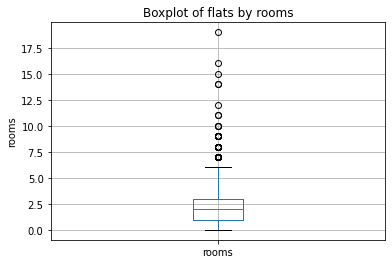

In [53]:
data_final.boxplot(column=['rooms'])
plt.ylabel('rooms')
plt.title('Boxplot of flats by rooms')
plt.show()

Встречаем ожидаемое распредление. Большинство квартир на рынке имеют от 1 до 3х комнат, далее резкое падение. Боксплот демострирует выбросы: квартиры с 7 и более комнатами. 

#### Гистограмма по высоте потолков.

In [54]:
data_final['ceiling_height'].describe()

count    23621.000000
mean         2.734390
std          0.980144
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

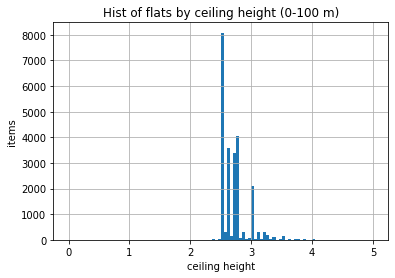

In [56]:
data_final.hist('ceiling_height', bins=100, range=(0, 5))
plt.ylabel('items'),
plt.xlabel('ceiling height')
plt.title('Hist of flats by ceiling height (0-100 m)')
plt.show()

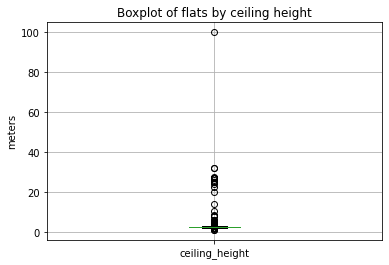

In [58]:
data_final.boxplot(column=['ceiling_height'])
plt.ylabel('meters')
plt.title('Boxplot of flats by ceiling height')
plt.show()

Заранее проверили максимум, значение в 100 метров приведет к нечитабельной гистограмме, поэтому снова ограничили масштаб. 
Распредление показывает, что большая часть квартир имеет высоту потолков 2,5 метра. Больше реже. боксплот подтверждает наличие выбросов. Почистим их тоже

#### Время продажи квартиры.

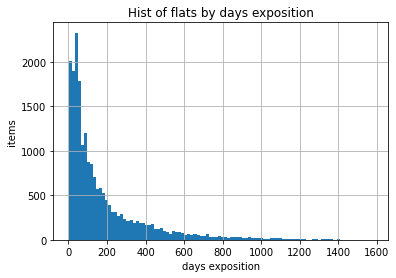

In [59]:
data_final.hist('days_exposition', bins=100)
plt.ylabel('items'),
plt.xlabel('days exposition')
plt.title('Hist of flats by days exposition')
plt.show()

In [60]:
data_final['days_exposition'].describe() #посмотрим на среднее и медиану

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры 180 дней или полгода, нормальное значение на первый взгляд, но медиана демонстрирует иное. По ее данным половина всех квартир на рынке продается всего за 3 месяца с момента публикации объявления. Значит слишком долгие продажи искажают среднее.  
Взглянем на ящик с усами.


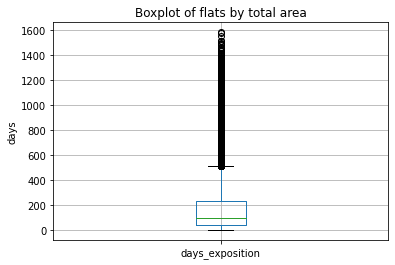

In [61]:
data_final.boxplot(column=['days_exposition'])
plt.ylabel('days')
plt.title('Boxplot of flats by total area')
plt.show()

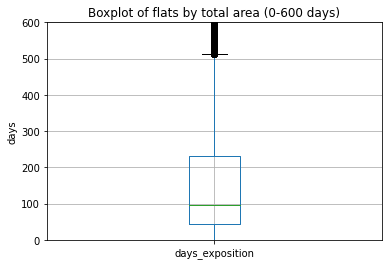

In [63]:
plt.ylim(0, 600)
data_final.boxplot(column=['days_exposition'])
plt.ylabel('days')
plt.title('Boxplot of flats by total area (0-600 days)')
plt.show()

##### Вывод.
Судя по диграмме размаха, у нас в значениях дней продажи много выбросов, их можно отнести к лишким долгим продажам. Это будет период более 500 дней. 
Скоростными же можем назвать те значения, что расположились в 1 квартили: 45 дней.

#### Общий вывод.

Гистограммы демонстрируют, что большая часть продаваемых квартир имеет небольшую площадь от 30 и до 60 метров.
Большая часть цен находится в диапазоне от 3 до 6 млн рублей.
Большинство квартир на рынке имеют от 1 до 3х комнат, далее резкое падение.
Распредление показывает, что большая часть квартир имеет высоту потолков 2,5 метра.
Выяснили быструю и долгую прожаду в днях: это 45 и 500 дней. Половина всех квартир на рынке продается за 95 дней. Возьмем это за среднестатистический показатель.


### Избавлямся от выбросов. <a name="paragraph6"></a>

На этапе построения гистограмм и ящиков с усами было выявлено множество выбросов по нескольким параметрам. Необходимо избавиться от них для того, чтобы картина стала более реальной.

In [64]:
def cut(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    igr = q3 -q1
    cut_value = q3 + 1.5*igr
    return df.query('{} <= @cut_value'.format(column))

In [65]:
data_final_cutted = cut(data_final, 'total_area')
data_final_cutted = cut(data_final_cutted, 'last_price')
data_final_cutted = cut(data_final_cutted, 'rooms')
data_final_cutted = cut(data_final_cutted, 'ceiling_height')
data_final_cutted = cut(data_final_cutted, 'days_exposition')                     

In [66]:
cutted_part = 1 - len(data_final_cutted) / len(data)

In [67]:
print('Отрезали', '{:.0%}'.format(cutted_part))

Отрезали 31%


#### Вывод.
Благодаря боксплотам мы обнаружили множество выбросов среди различных параметров. Огромные площади, высокие цены, большое количество комнат, высокие потолки, долгие продажи. 
Мы обрезали 31% данных, в которых содержалась информация о квартирах элитного сегмента, а также квартиры с ошибочно завышенными данными.

### Какие факторы больше всего влияют на стоимость квартиры? <a name="paragraph7"></a>
Зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

##### Зависимость цены от площади.

Коэффициент корреляции 0.67


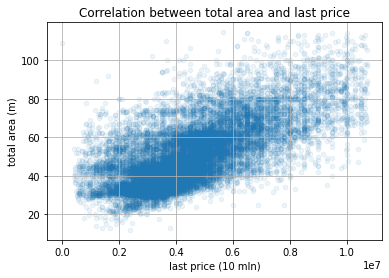

In [68]:
data_final_cutted.plot(x='last_price', y='total_area', kind='scatter', alpha= 0.08, grid=True)
plt.ylabel('total area (m)'),
plt.xlabel('last price (10 mln)')
plt.title('Correlation between total area and last price')
print('Коэффициент корреляции', '{:.2}'.format(data_final_cutted['last_price'].corr(data_final_cutted['total_area'])))

Диаграмма рассеяния и коэффициент корреляции дают ожидаемый показатель: прямую зависимость, чем больше площадь, тем выше цена.

##### Зависимость цены от количества комнат.

Коэффициент корреляции 0.42


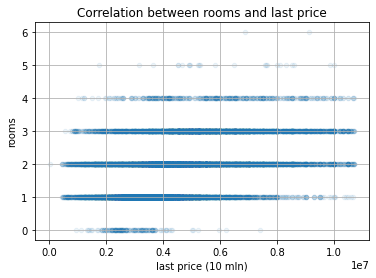

In [69]:
data_final_cutted.plot(x='last_price', y='rooms', kind='scatter', alpha= 0.08, grid=True)
plt.ylabel('rooms'),
plt.xlabel('last price (10 mln)')
plt.title('Correlation between rooms and last price')
print('Коэффициент корреляции', '{:.2}'.format(data_final_cutted['last_price'].corr(data_final_cutted['rooms'])))

По нашей диаграмме видно, что на цена мало зависит от количества комнат. Разницу можем видеть только на нижнем пороге цены: мы врядли найдем 4х комнатную по цене самой дешевой 1-комнатной. А вот верхнего порога практически нет, т.к. там играют роль уже другие факторы.

##### Зависимость цены от удаленности от центра.

Коэффициент корреляции -0.31


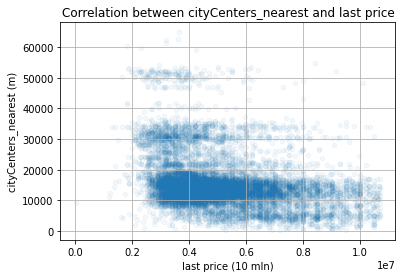

In [70]:
data_final_cutted.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha= 0.05, grid=True)
plt.ylabel('cityCenters_nearest (m)'),
plt.xlabel('last price (10 mln)')
plt.title('Correlation between cityCenters_nearest and last price')
print('Коэффициент корреляции', '{:.2}'.format(data_final_cutted['last_price'].corr(data_final_cutted['cityCenters_nearest'])))

Обратная зависимость: чем дальше от центра, тем ниже цена.

##### Зависимость цены от этажа.

Коэффициент корреляции 0.17


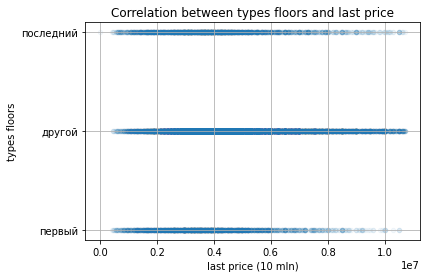

In [71]:
data_final_cutted.plot(x='last_price', y='types_floors', kind='scatter', alpha= 0.05, grid=True)
plt.ylabel('types floors'),
plt.xlabel('last price (10 mln)')
plt.title('Correlation between types floors and last price')
print('Коэффициент корреляции', '{:.2}'.format(data_final_cutted['last_price'].corr(data_final_cutted['floor'])))

Когда квартира находится не на первом и не на последнем этаже, он на ее стоимость этаж мало влияет. 
А вот если это первый или последний этаж - слишком много за нее не заплатят.

##### Зависимость цены от дня, месяца, года.

AxesSubplot(0.125,0.125;0.775x0.755)


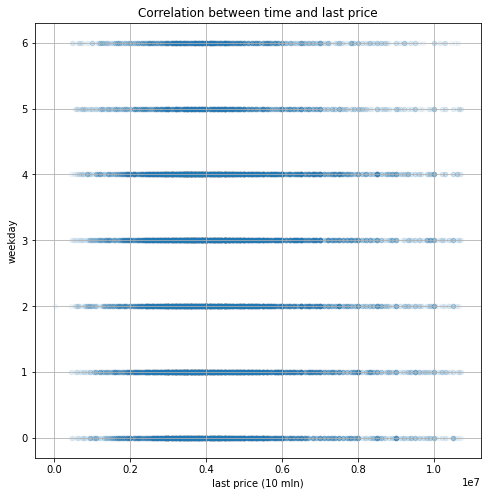

AxesSubplot(0.125,0.125;0.775x0.755)


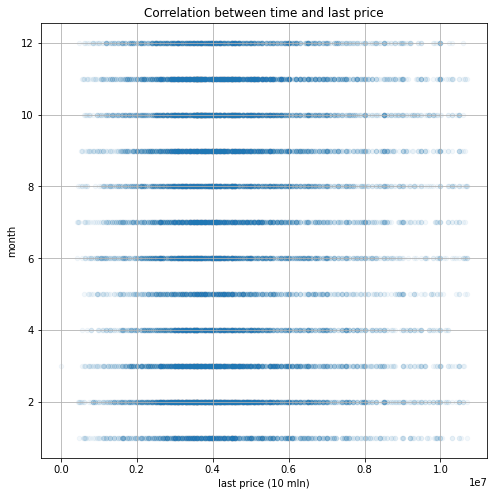

AxesSubplot(0.125,0.125;0.775x0.755)


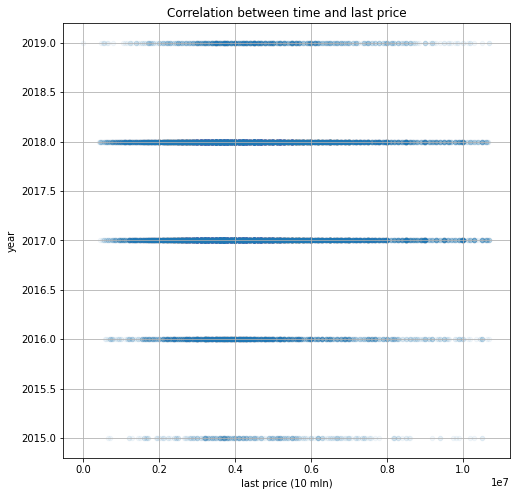

In [73]:
time_parametes = ['weekday', 'month', 'year']
for element in time_parametes:
    print(data_final_cutted.plot(x='last_price', y=element, kind='scatter', alpha= 0.05, grid=True, figsize=(8, 8)))
    plt.xlabel('last price (10 mln)')
    plt.title('Correlation between time and last price')
    plt.show()

Зависимость от дня недели и месяца нет, а вот по годам она видна. В 2015 году покупалось очень мало квартир и все в средней цене из-за экономического кризиса. Далее в 2017 и 2018 подъем рынка недвижимости, покупали любые квартиры, в 2019 снова спад цен.

#### Общий вывод.

Исследование зависимости цены от заданных параметров показало, что:
Цена напрямую коррелирует с площадью квартиры.
Имеет зависимость от количества комнат, но только потому что больше комнат означает большую площадь. Если рассмотреть отдельно группы квартир по комнатам, то увидим, что внутри группы наблюдаются разные цены.
Удаленность от центра показывает обратную зависимость: чем дальше от центра, тем ниже цена.
Цена зависит от этажности, квартиры не на первом или последнем этаже могут стоить дороже.
Отсутствует зависимость между ценой, днем и месяцем, но есть зависимость от года. В кризисные времена квартиры продают дешевле, в годы подъема - дороже.

#### Выбираем 10 населённых пунктов с наибольшим числом объявлений. 
Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [74]:
famous_locality = data_final_cutted.pivot_table(index='locality_name', values=['sq_price', 'last_price'],
                    aggfunc={'sq_price':['count','mean'], 'last_price':'mean'})
famous_locality.columns = ['last_price_mean','count','sq_price_mean']
famous_locality = famous_locality.sort_values(by='count', ascending=False).head(10)

display(famous_locality)

,last_price_mean,count,sq_price_mean
locality_name,,,
Санкт-Петербург,5.256368e+06,10274,103562.944487
посёлок Мурино,3.625959e+06,475,85969.843335
посёлок Шушары,4.002542e+06,378,77935.910739
Всеволожск,3.593668e+06,297,66528.626791
посёлок Парголово,4.376664e+06,282,89163.306144
Колпино,3.702961e+06,278,74700.736025
деревня Кудрово,4.228588e+06,263,92602.833271
Пушкин,5.105029e+06,251,98982.340592
Гатчина,3.334831e+06,237,68286.787543


In [75]:
print('Пункт с самой высокой стоимостью жилья -', famous_locality['last_price_mean'].idxmax())
print('Пункт с самой низкой стоимостью жилья -', famous_locality['last_price_mean'].idxmin())

Пункт с самой высокой стоимостью жилья - Санкт-Петербург
Пункт с самой низкой стоимостью жилья - Выборг


#### Квартиры в центре Санкт-Петербурга.

Выделим квартиры в Санкт-Петербурге.

In [76]:
data_final_cutted_spb = data_final_cutted.query('locality_name == "Санкт-Петербург"')

Построим график цены и удаленности от центра.

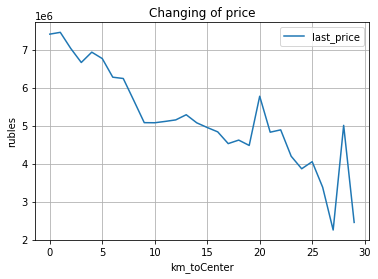

In [79]:
data_final_cutted_spb['km_toCenter'] = data_final_cutted_spb['cityCenters_nearest'] // 1000
data_final_cutted_spb['mean_price_FOR_km_toCenter'] = data_final_cutted_spb['last_price'] / data_final_cutted_spb['km_toCenter']
mean_price_km_toCenter = data_final_cutted_spb.pivot_table(index='km_toCenter', 
                                                           values='last_price', 
                                                           aggfunc='mean').reset_index()
mean_price_km_toCenter.plot(x='km_toCenter', 
                            y='last_price', 
                            grid=True)
plt.ylabel('rubles')
plt.title('Changing of price')
plt.show()

Резкое и стабильное повышение цены наблюдается на участке от 9 км. Отнесем к центру именно эту область - радиус 9 км.

#### Проанализируем квартиры в центре.

In [80]:
data_final_cutted_spb_center = data_final_cutted_spb.query('km_toCenter < 9')

Рассмотрим площадь, цену, число комнат, высоту потолков.

In [81]:
parameters = ['total_area', 'last_price', 'rooms', 'ceiling_height']

[[<AxesSubplot:title={'center':'total_area'}>]]
[[<AxesSubplot:title={'center':'last_price'}>]]
[[<AxesSubplot:title={'center':'rooms'}>]]
[[<AxesSubplot:title={'center':'ceiling_height'}>]]


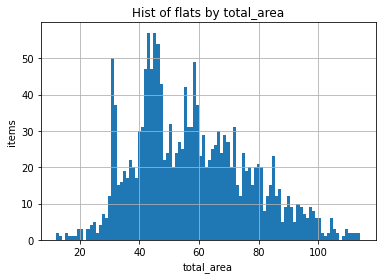

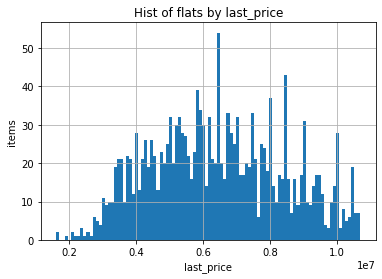

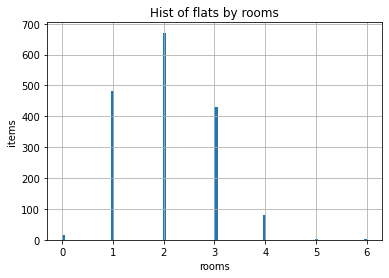

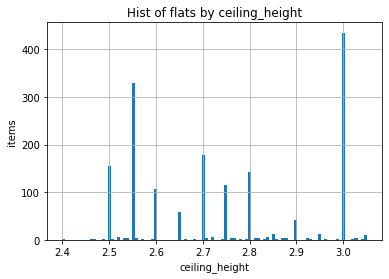

In [82]:
for element in parameters:
    print(data_final_cutted_spb_center.hist(element, bins=100))   
    plt.ylabel('items'),
    plt.xlabel(element)
    plt.title('Hist of flats by {}'.format(element))

In [83]:
data_final_cutted_spb_center.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'locality_name', 'cityCenters_nearest',
       'days_exposition', 'ceiling_height_avg', 'living_area_m',
       'kitchen_area_m', 'cityCenters_nearest_m', 'sq_price', 'weekday',
       'month', 'year', 'types_floors', 'living_to_total', 'kitchen_to_total',
       'km_toCenter', 'mean_price_FOR_km_toCenter'],
      dtype='object')

Квартиры в центре распределены по площади также, как и в целом по всей выборке. В основном это квартиры от 30 и до 60 кв. м площадью.
Цены на квартиры сильно скачут. Большинство стоит 7,5 млн рублей, но гистограмма рваная, что говорит о том, что цены сильно разнятся.
Количество комнат в квартирах в центральном районе можно собрать в рейтинг: на первом месте двушки, далее однокомнатные, чуть меньше трешек. 
А вот высота потолков сильно отличается от общего показателя по выборке. Здесь большая часть квартир имеет потолки 3метра. Полагаю из-за старых дореволюционных домов.


#### Факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [84]:
data_final_cutted_spb_center2 = data_final_cutted_spb_center[['last_price', 'total_area', 'rooms', 'types_floors', 'cityCenters_nearest']]

In [85]:
data_final_cutted_spb_center2.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.721023,0.451451,-0.246039
total_area,0.721023,1.000000,0.800384,-0.236410
rooms,0.451451,0.800384,1.000000,-0.193742
cityCenters_nearest,-0.246039,-0.236410,-0.193742,1.000000


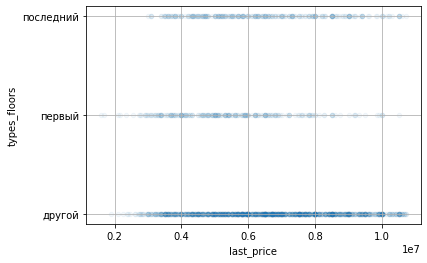

In [89]:
data_final_cutted_spb_center.plot(x='last_price', y='types_floors', kind='scatter', alpha= 0.05, grid=True)
plt.show()

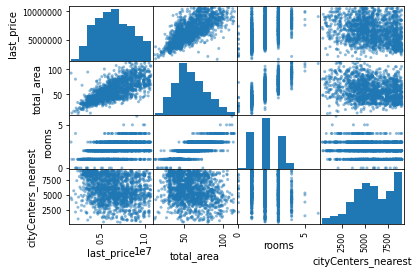

In [90]:
pd.plotting.scatter_matrix(data_final_cutted_spb_center2)
plt.show()

In [91]:
data_final_cutted_spb_center3 = data_final_cutted_spb_center[['last_price', 'year', 'month', 'weekday']]

In [93]:
data_final_cutted_spb_center3.corr()

,last_price,year,month,weekday
last_price,1.000000,-0.014870,-0.019399,0.031078
year,-0.014870,1.000000,-0.245727,0.025154
month,-0.019399,-0.245727,1.000000,0.041835
weekday,0.031078,0.025154,0.041835,1.000000


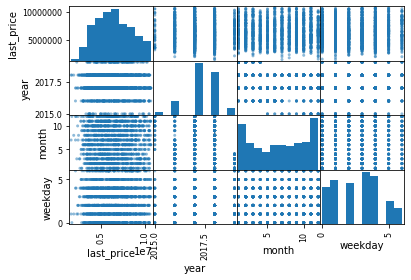

In [94]:
pd.plotting.scatter_matrix(data_final_cutted_spb_center3)
plt.show()

#### Вывод.

Исследование зависимости цены от заданных параметров показало, что:

Цена напрямую коррелирует с площадью квартиры и имеет еще больший коэффициент, нежели чем по общей выборке.
Имеет зависимость от количества комнат, но только потому что больше комнат означает большую площадь. Если рассмотреть отдельно группы квартир по комнатам, то увидим, что внутри группы наблюдаются разные цены.
Удаленность от центра показывает обратную зависимость: чем дальше от центра, тем ниже цена.
Цена зависит от этажности, квартиры на другом этаже дороже и их в принципе значительно больше, чем на последнем и первом.
Также как и в общем выборке отсутствует зависимость между ценой, днем и месяцем, но есть зависимость от года. В кризисные времена квартиры продают дешевле, в годы подъема - дороже.



### Общий вывод. <a name="paragraph8"></a>

Группа полученных данных содержала в себе информацию о **23699** квартирах. Было выявлено большое число пустых значений в различных столбцах, обусловленное отчасти ошибками в выгрузках, отчасти тем, что создатели не заполнили поля. Мы заполнили часть из них благодаря внутренним связям между данными. 

Для целей исследования произвели расчеты по важным показателям: цена на кв.м, отношения кухни и жилой площади к общей, а также категорировали этажи и выделили временные периоды.

Далее изучив по гистограммам распределения квартир мы выяснили, что данные сильно искажены и разрозненны из-за множества выбивающихся вариантов квартир. Прибегнув к боксплотам, удалось выделить выбросы по верхним границам в полтора квартиля. Так мы обрезали слишком дорогие/большие/многокомнатые квартиры, а также квартиры с нереально высокими потолками и очень длительным периодом продаж. В результате бы **избавились от 31% вредных данных** и сформировали финальный датафрейм со среднестатистическими квартирами: большую часть рынка занимают квартиры от 1 до 3х комнат с высотой потолков в среднем от 2,5 до 3х метров. Площадь варьируется от 30 до 60 метров. Продаются они как правило примерно за 3 месяца.


**Исследование зависимости цены от заданных параметров показало, что:**
* Самые дорогие квартиры продаются в Санкт-Петербурге, а самые дешевые в Выборге.
* Цена напрямую связана с площадью квартиры.
* Имеет сложную зависимость от количества комнат. Сложная, значит играет роль еще и размер площади.
* Цена уменьшается при удалении от центра. 
* Квартиры не на первом или последнем этаже стоят дороже, но зависимость тут слабая.
* В кризисные времена квартиры продают дешевле, в годы подъема - дороже.

Выделив квартиры также в отдельном, центральном сегменте Санкт-Петербуга, выяснили, что корреляция цен от площади, комнат, этажности, года продажи очень похожа на общие данные.
А распредление квартир несколько отличается. В центре выше потолки, намного меньше квартир на первом и последнем этажах и сильно разроненные цены из-за того, что дома в центре как правило старые, имеют различное состояние.
Поэтому необходимо выделить также важнейший дополнительный параметр - **год постройки дома**, а также **год последнего капитального ремонта**. Для центральных квартир этот параметр чаще важнее удаленности от парков, прудов и прочего.

